In [1]:
import pandas as pd

In [2]:
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

In [3]:
data_info = {
    "head":data.head(),
    "info":data.info(),
    "columns":data.columns.tolist(),
    "description":data.describe()
}
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

{'head':    Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
 0   27      F      No         No              No        Euthyroid   
 1   34      F      No        Yes              No        Euthyroid   
 2   30      F      No         No              No        Euthyroid   
 3   62      F      No         No              No        Euthyroid   
 4   62      F      No         No              No        Euthyroid   
 
           Physical Examination Adenopathy       Pathology     Focality Risk  \
 0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
 1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
 2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
 3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
 4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   
 
      T   N   M Stage       Response Recurred  
 0  T1a  N0  M0     I  Indeterminate    

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

Data Cleaning

In [5]:
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

Correlation Analysis

In [6]:
correlation_matrix = data.corr()

Feature Scaling

In [7]:
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled['Age'] = scaler.fit_transform(data[['Age']])

Train-Test Split

In [8]:
X = data_scaled.drop(columns=['Recurred'])
y = data_scaled['Recurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Model Training

In [9]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

Model Evaluation

In [10]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test) [:,1]

Metrics Calculation

In [11]:
classification_rep = classification_report(y_test, y_pred, target_names=["No", "Yes"])
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

Visualisation: Correlation Heatmap

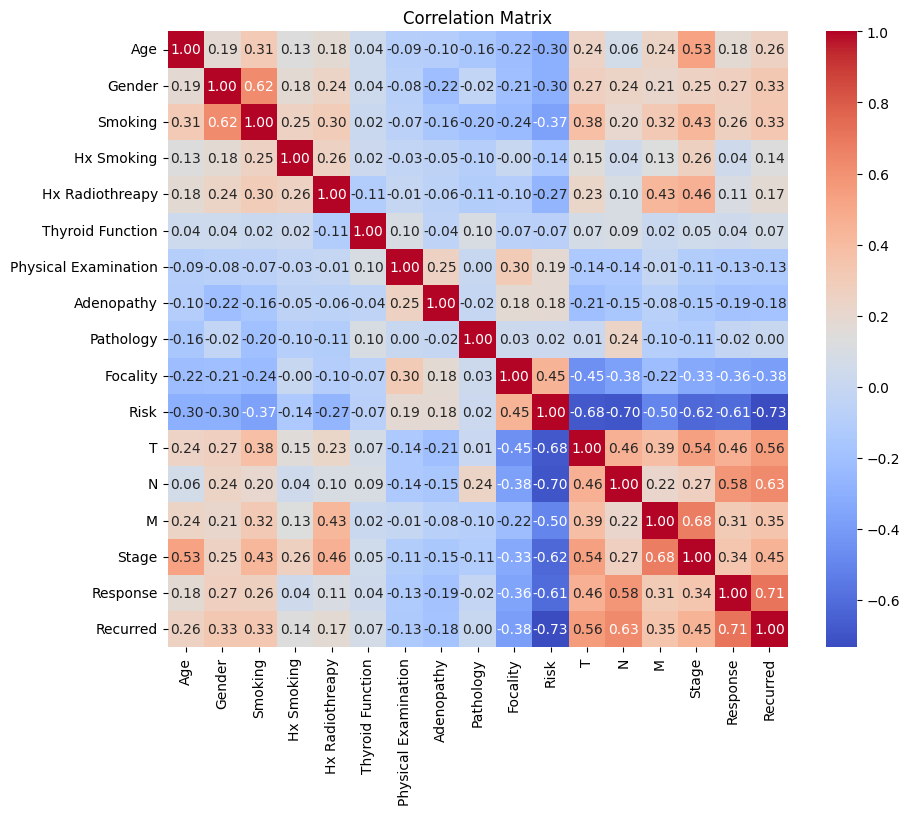

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
classification_rep, conf_matrix, roc_auc

('              precision    recall  f1-score   support\n\n          No       0.95      0.98      0.96        55\n         Yes       0.95      0.86      0.90        22\n\n    accuracy                           0.95        77\n   macro avg       0.95      0.92      0.93        77\nweighted avg       0.95      0.95      0.95        77\n',
 array([[54,  1],
        [ 3, 19]]),
 np.float64(0.9871900826446282))

Feature Importance Analysis

In [14]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature':X.columns,
    'Importance':importances
}).sort_values(by='Importance',ascending=False)

Plot Feature Importances

C:\Users\SilverSword\AppData\Local\Temp\ipykernel_16796\2265994888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


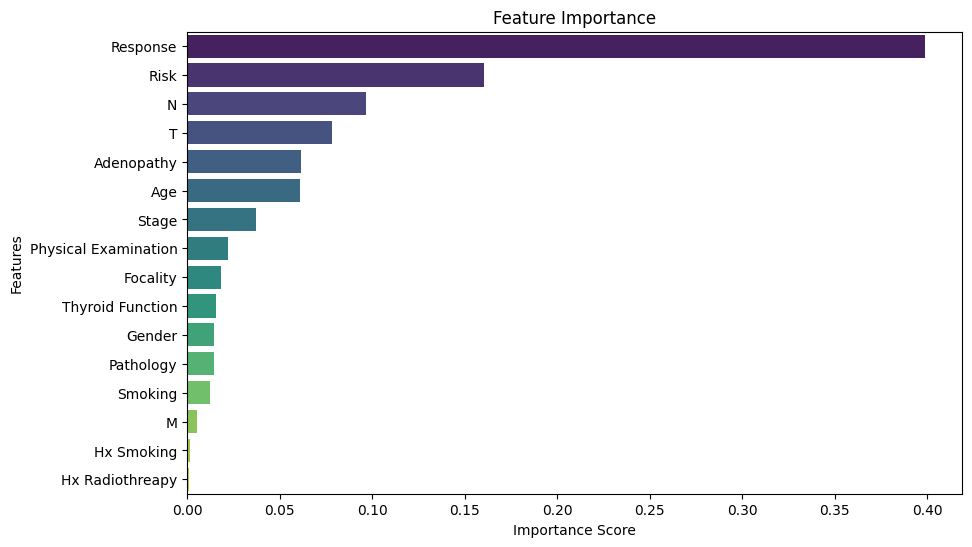

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [16]:
feature_importance_df

,Feature,Importance
15,Response,0.398944
10,Risk,0.160463
12,N,0.096866
11,T,0.078283
7,Adenopathy,0.061624
0,Age,0.061159
14,Stage,0.037351
6,Physical Examination,0.022221
9,Focality,0.018178
5,Thyroid Function,0.015776
